# Import Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#3-Hidden Layer Neural Network

In [22]:
class NeuralNet():
  def __init__(self):
    inputLayerNeurons = 2
    hiddenLayerNeurons1 = 8
    hiddenLayerNeurons2 = 32
    hiddenLayerNeurons3 = 16
    outputLayerNeurons = 3

    self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)
    self.W_H2 = np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)
    self.W_H3 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)
    self.W_HO = np.random.randn(hiddenLayerNeurons3, outputLayerNeurons)
    self.lr = 0.01

  def relu(self, X, der = False):
    if der == True:
      return np.where(X > 0, 1, 0)
    return np.maximum(0, X)

  def softmax(self, X, der = False):
    if der == True:
      return self.softmax(X) * (1 - self.softmax(X))
    exps = np.exp(X - np.max(X, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

  def feedForward(self, X):
    hidden_input1 = np.dot(X, self.W_HI)
    self.hidden_output1 = self.relu(hidden_input1)

    hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
    self.hidden_output2 = self.relu(hidden_input2)

    hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
    self.hidden_output3 = self.relu(hidden_input3)

    output_input = np.dot(self.hidden_output3, self.W_HO)
    ypred = self.softmax(output_input)

    return ypred

  def backProp(self, X, Y, ypred):
    output_error = Y - ypred
    output_delta = self.lr * output_error * self.softmax(ypred, der = True)

    hidden_error3 = np.dot(output_delta, self.W_HO.T)
    hidden_delta3 = self.lr * hidden_error3 * self.relu(self.hidden_output3, der = True)

    hidden_error2 = np.dot(hidden_delta3, self.W_H3.T)
    hidden_delta2 = self.lr * hidden_error2 * self.relu(self.hidden_output2, der = True)

    hidden_error1 = np.dot(hidden_delta2, self.W_H2.T)
    hidden_delta1 = self.lr * hidden_error1 * self.relu(self.hidden_output1, der = True)

    self.W_HI += X.T.dot(hidden_delta1)
    self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
    self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
    self.W_HO += self.hidden_output3.T.dot(output_delta)

  def train(self, X, Y):
    output = self.feedForward(X)
    self.backProp(X, Y, output)


# Training model

Epoch: 0, Error: 0.44
Epoch: 1, Error: 0.22000000000000844
Epoch: 2, Error: 0.22000000000001965
Epoch: 3, Error: 0.22000000000000483
Epoch: 4, Error: 0.15330707186002754
Epoch: 5, Error: 0.07995771118417758
Epoch: 6, Error: 0.058984462064953835
Epoch: 7, Error: 0.046684774647144295
Epoch: 8, Error: 0.03065798264815429
Epoch: 9, Error: 0.023468856138489442
Epoch: 10, Error: 0.014401066950753539
Epoch: 11, Error: 0.007972121786671893
Epoch: 12, Error: 0.006782667792448384
Epoch: 13, Error: 0.006689640219156167
Epoch: 14, Error: 0.0066733168069574526
Epoch: 15, Error: 0.006669048962226946
Epoch: 16, Error: 0.006667605958171698
Epoch: 17, Error: 0.0066670538909694935
Epoch: 18, Error: 0.006666830296414115
Epoch: 19, Error: 0.006666736925084833
Epoch: 20, Error: 0.0066666971720764825
Epoch: 21, Error: 0.006666680018488381
Epoch: 22, Error: 0.00666667254485218
Epoch: 23, Error: 0.006666669265695262
Epoch: 24, Error: 0.006666667819494643
Epoch: 25, Error: 0.006666667179260937
Epoch: 26, Error

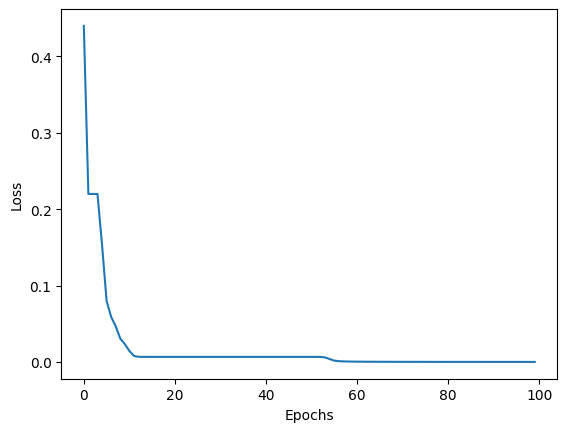

In [23]:
nn = NeuralNet()
X, Y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
Y = Y.astype(int)
Y_one_hot = np.zeros((Y.size, Y.max() + 1))
Y_one_hot[np.arange(Y.size), Y] = 1
err = []
for epochs in range(100):
  nn.train(X, Y_one_hot)
  loss = np.mean(np.abs(Y_one_hot - nn.feedForward(X)))
  err.append(loss)
  print(f"Epoch: {epochs}, Error: {loss}")

plt.plot(err)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Decision boundary visualization

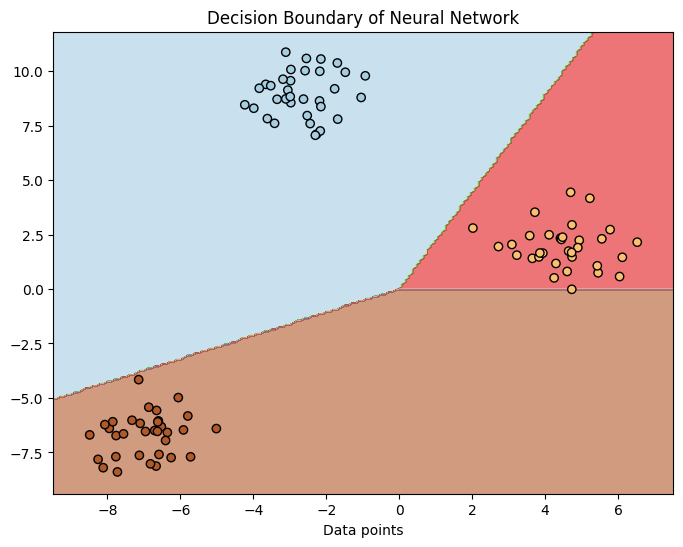

In [24]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = nn.feedForward(grid_points)
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes = predicted_classes.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predicted_classes, alpha=0.6, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Decision Boundary of Neural Network")
plt.xlabel("Data points")
plt.show()